In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
import numpy as np

In [4]:
# Configure the CNN (Convolutional Neural Network).

classifier = Sequential()

# Convolution - extracting appropriate features from the input image.
# Non-Linearity (RELU) - replacing all negative pixel values in feature map by zero.

classifier.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3),
               activation='relu'))

# Pooling: reduces dimensionality of the feature maps but keeps the most important information.

classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer and flattening in order to arrange 3D volumes into a 1D vector.

classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())

# Fully connected layers: ensures connections to all activations in the previous layer.

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=2, activation='sigmoid'))

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
        zoom_range=0.2, horizontal_flip=True)
train_generator=train_datagen.flow_from_directory('C:/Users/ANANNYA/Desktop/Data/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 3264 images belonging to 2 classes.


In [8]:
print(train_generator.n)
print(train_generator.batch_size)
print(253//32)

3264
32
7


In [9]:
classifier.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
step_size_train=train_generator.n//train_generator.batch_size
r = classifier.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=20)

C:\Users\ANANNYA\AppData\Local\Temp\ipykernel_12680\2617235899.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = classifier.fit_generator(generator=train_generator,


Epoch 1/20
102/102 [==============================] - 96s 923ms/step - loss: 0.3991 - accuracy: 0.8750
Epoch 2/20
102/102 [==============================] - 77s 751ms/step - loss: 0.3026 - accuracy: 0.8701
Epoch 3/20
102/102 [==============================] - 80s 777ms/step - loss: 0.2858 - accuracy: 0.8775
Epoch 4/20
102/102 [==============================] - 76s 739ms/step - loss: 0.2677 - accuracy: 0.8787
Epoch 5/20
102/102 [==============================] - 73s 717ms/step - loss: 0.2628 - accuracy: 0.8756
Epoch 6/20
102/102 [==============================] - 74s 725ms/step - loss: 0.2667 - accuracy: 0.8830
Epoch 7/20
102/102 [==============================] - 73s 716ms/step - loss: 0.2569 - accuracy: 0.8836
Epoch 8/20
102/102 [==============================] - 73s 715ms/step - loss: 0.2464 - accuracy: 0.8860
Epoch 9/20
102/102 [==============================] - 73s 716ms/step - loss: 0.2501 - accuracy: 0.8848
Epoch 10/20
102/102 [==============================] - 73s 711ms/step - l

dict_keys(['loss', 'accuracy'])


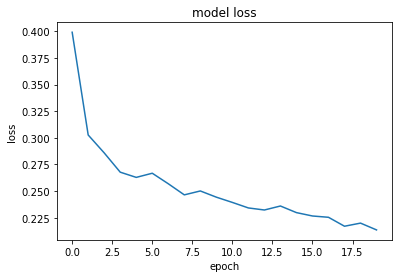

In [11]:
# Plot training and validation loss/accuracy
import matplotlib.pyplot as plt
print(r.history.keys())
# Loss
plt.plot(r.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

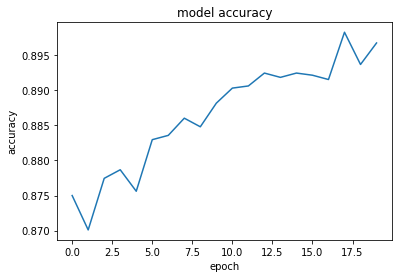

In [12]:
plt.plot(r.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()